In [3]:
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong
# DATA Preprocessiong

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
training_set = dataset_train.iloc[:, 1:2].values

In [9]:
# Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = MinMaxScaler()

In [13]:
training_set_scaled = sc.fit_transform(training_set)

In [15]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [16]:
# Creating a Data Structure with 60 timesteps and 1 output

In [17]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [19]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [20]:
# ReShaping

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [23]:
# Building the RNN
# Building the RNN
# Building the RNN
# Building the RNN
# Building the RNN
# Building the RNN
# Building the RNN
# Building the RNN
# Building the RNN
# Building the RNN
# Building the RNN

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
# Initialising the RNN

In [26]:
regressor = Sequential()

In [27]:
# ADDing first LSTM layer

In [31]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [33]:
# ADDing second LSTM layer

In [36]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [34]:
# ADDing third LSTM layer

In [37]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [38]:
# ADDing forth LSTM layer

In [39]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [40]:
# Adding the Output Layer

In [41]:
regressor.add(Dense(units=1))

In [42]:
# Compile the RNN

In [43]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
# Fitting the RNN in the Training set

In [45]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 26s 90ms/step - loss: 0.0379
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0071
Epoch 3/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0079
Epoch 4/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0060
Epoch 10/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0044
Epoch 13/100
38/38 [====

In [49]:
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results
# Making the Prediction and Visualising the Results

In [50]:
#Getting the real stock price of 2017

In [51]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [52]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [53]:
# Getting the Predicted stock price of 2017

In [54]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [55]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values

In [56]:
inputs = inputs.reshape(-1,1)

In [57]:
inputs = sc.transform(inputs)

In [58]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60 : i, 0])
    
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [59]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 6s 6s/step


In [60]:
predicted_stock_price

array([[799.2173 ],
       [796.637  ],
       [796.9368 ],
       [797.89655],
       [800.54767],
       [805.5293 ],
       [809.72833],
       [810.96387],
       [811.0798 ],
       [811.06323],
       [811.16174],
       [811.24744],
       [811.43097],
       [812.3158 ],
       [813.49634],
       [818.17377],
       [824.46185],
       [830.7704 ],
       [833.67505],
       [829.3252 ]], dtype=float32)

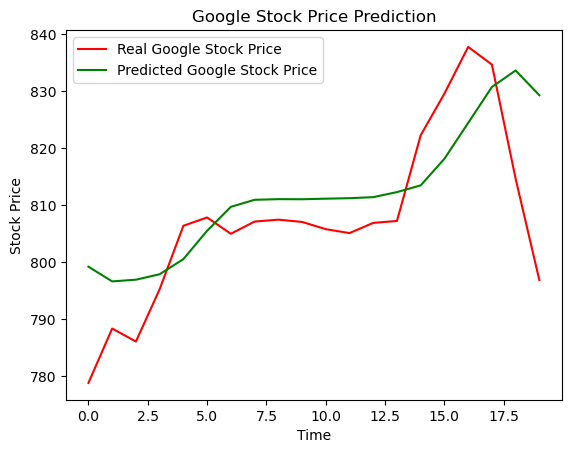

In [64]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()